<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Homework/HW11_12_Time_series_regression_(AAPL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2: Regression

<font color='tomato'><font size="6">Apple stock (AAPL) : </font>

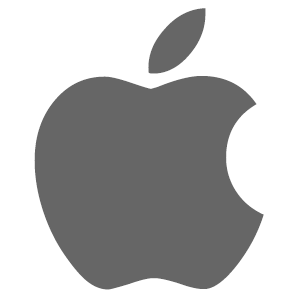

<fieldset>

- Design and write python code to create a regression model to predict the close price for the next day.

- These dataset reports the stock prices including open, high, low, close, volume, and also Name of the company'

<font size="2">Ref: dealing with time series : https://www.youtube.com/watch?v=UFuo7EHI8zc



---



##### 1. Collecting the data

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns

In [ ]:
AAPL = pd.read_csv("/content/drive/MyDrive/Data /AAPL_data.csv")

AAPL

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL




---



##### 2. Data Exploration

In [ ]:
# Description of each feature

AAPL.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


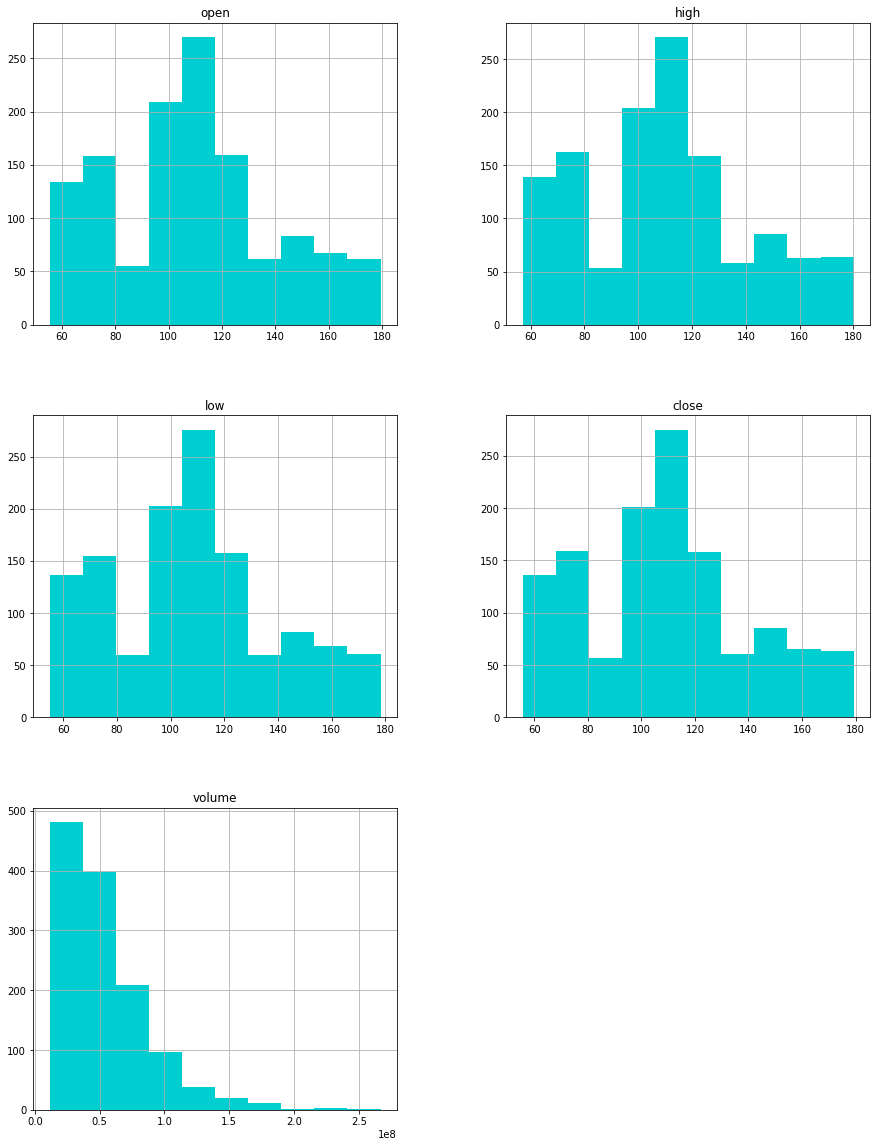

In [ ]:
AAPL.hist(bins=10, figsize= (15,20), color='darkturquoise')

plt.show()



---



> I smelled the impractical of the feature 'Name', since the name of the dataset already did self-explantory that every instance must belong to AAPL, so let's check it is true?

In [ ]:
AAPL.Name.value_counts()

# This column should be removed due to all of the values are AAPL

AAPL    1259
Name: Name, dtype: int64

In [ ]:
AAPL.drop('Name',axis=1,inplace=True)



---



> C) Time series data exploration

In [ ]:
AAPL['date'].dtype

dtype('O')

In [ ]:
#Convert the dtype from Object to datetime

AAPL['date']= pd.to_datetime(AAPL['date'], format='%Y-%m-%d')

In [ ]:
# Let's test this by checking the day of the first instance

AAPL.loc[0,'date'].day_name()

'Friday'

In [ ]:
# Let's check how many days the data were recorded!

AAPL['date'].max() - AAPL['date'].min()

# 1825 days!, which is approximate 5 year from 2013 to 2018

Timedelta('1825 days 00:00:00')

> Let's plot the time series for 'close'

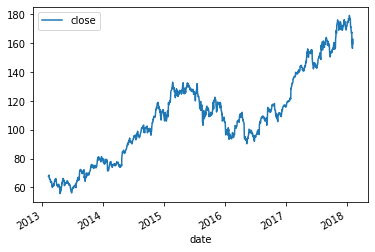

In [ ]:
AAPL.plot.line(x='date',y='close')

- From my analysis, It's ok to use Decomposition Method since every feature seems to have trend and Seasonality. so, It's good to use 
> Decompose Time series

- But, before doing that, we must do data preprocessing the data like splitting the data to training & test set



---



##### 3. Data Preprocessing

In [ ]:
#Checking missing values

if (len(AAPL.columns) == AAPL.isnull().sum(axis=0).value_counts()[0]):
  print('No missing value was found')

No missing value was found


In [ ]:
AAPL

,date,open,high,low,close,volume
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838


In [ ]:
# Split the attributes & features

X = AAPL['date']

y = AAPL['close']

In [ ]:
# Split the training & test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

> After it got splitted, we need to sort it from the oldest to newest day

In [ ]:
# Training set

data_train = pd.concat([X_train,y_train],axis=1)
data_train.sort_values(by='date', inplace=True);  data_train

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556
...,...,...
1251,2018-01-29,167.9600
1253,2018-01-31,167.4300
1254,2018-02-01,167.7800
1256,2018-02-05,156.4900


In [ ]:
# Test set

data_test = pd.concat([X_test,y_test],axis=1)
data_test.sort_values(by='date', inplace=True);  data_test

,date,close
10,2013-02-25,63.2571
23,2013-03-14,61.7857
29,2013-03-22,65.9871
31,2013-03-26,65.8765
32,2013-03-27,64.5828
...,...,...
1246,2018-01-22,177.0000
1249,2018-01-25,171.1100
1252,2018-01-30,166.9700
1255,2018-02-02,160.5000


In [ ]:
# Now define the start date, end date of each set

tr_start,tr_end = '2013-02-08','2018-02-06'
te_start,te_end = '2013-02-25','2018-02-07'

> Let's plot some of the time series of the train set

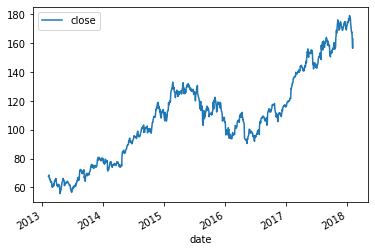

In [ ]:
data_train.plot.line(x='date',y='close')



---



In [ ]:
# How many days does this X_train contains

data_train['date'].max() - data_train['date'].min()

Timedelta('1824 days 00:00:00')

In [ ]:
data_train.index = data_train['date']

data_train.drop('date',axis=1,inplace=True);data_train

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556
...,...
2018-01-29,167.9600
2018-01-31,167.4300
2018-02-01,167.7800




---



- Decomposing Time series

> We will break the trend & seasonal and Residual of this time series graph

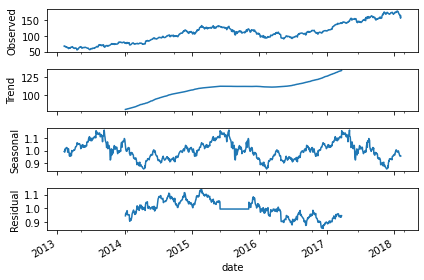

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

## freq = 365; mean trend of the year
result = seasonal_decompose(data_train['close'], freq = 365, model='multiplicative')
result.plot()

plt.show()

> According to the following graph, there are clearly a trend!
, so we will decide to pick the ARIMA as our model

--- 

<br>



### 4. Model Training

We decided to use ARIMA model to predict the time-series 

> Find the best parameter of ARIMA(p=?,d=?,q=?) 

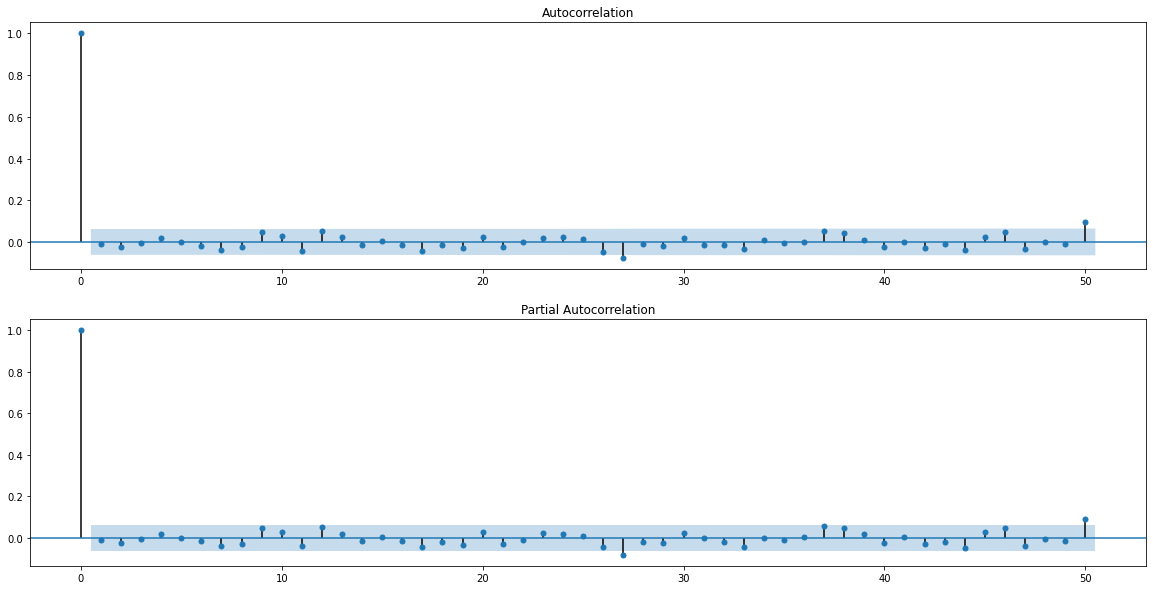

In [ ]:
#we use tra.diff()(differenced data), because this time series is unit root process.
import statsmodels.api as sm

fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(data_train.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data_train.diff().dropna(), lags=50, ax=ax[1])
plt.show()

# Find the best (p,q,)

> According to this graph, the parameter (p,d) is (1,1)

> Now, what is q

In [ ]:
"""

resDiff = sm.tsa.arma_order_select_ic(data_train, max_ar=7, max_ma=7, ic='aic', trend='c')

print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

"""

# This took very long time to run it..

"\n\nresDiff = sm.tsa.arma_order_select_ic(data_train, max_ar=7, max_ma=7, ic='aic', trend='c')\n\nprint('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')\n\n"

> This suggest us that (p,q) = (1,0) is the best pair

> So, we decided to use (p,d,q) = (1,1,0)

In [ ]:
# We really need to fulfill the date that doesn't occur in that period by N/A

df = data_train.resample("D").last()

In [ ]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let seasonal order = (0,0,0,0) to transform SARIMAX to ARIMA
model = SARIMAX(df,order=(1,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  close   No. Observations:                 1825
Model:               SARIMAX(1, 1, 7)   Log Likelihood               -2004.732
Date:                Wed, 07 Apr 2021   AIC                           4027.465
Time:                        16:12:12   BIC                           4077.004
Sample:                    02-08-2013   HQIC                          4045.744
                         - 02-06-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7565      0.409     -1.851      0.064      -1.558       0.045
ma.L1          0.6641      0.412      1.611      0.107      -0.144       1.472
ma.L2         -0.1493      0.055     -2.715      0.007      -0.257      -0.041
ma.L3          0.0148      0.073      0.201      0.841      -0.129       0.159
ma.L4          0.0931      0.065      1.425      0.154      -0.035       0.221
ma.L5         -0.0770      0.053     -1.466      0.143      -0.180       0.026
ma.L6         -0.0502      0.048     -1.038      0.299      -0.145       0.045
ma.L7          0.0539      0.037      1.448      0.147      -0.019       0.127
sigma2         2.2090      0.063     35.284      0.000       2.086       2.332
===================================================================================
Ljung-Box (Q):                       55.13   Jarque-Bera (JB):              9278.01
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

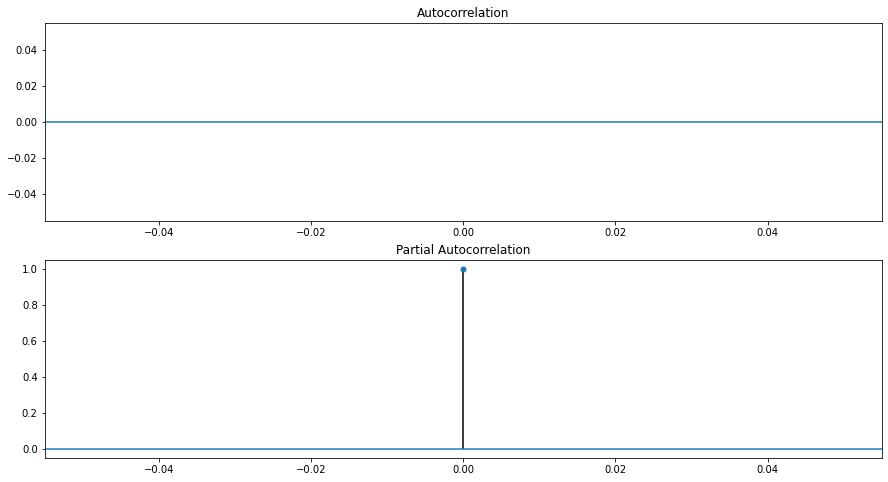

In [ ]:
res = model.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Let's predict
data_pred = model.predict(te_start,te_end)

In [ ]:
# Let's reshape the data_pred & data_test before evaluating it

data_test.index = data_test['date']

data_test.drop('date',axis=1,inplace=True);data_test
data_pred = pd.DataFrame(data_pred,columns=['close']);
data_pred.index.name = 'date'

data_pred = pd.DataFrame(data_pred,columns=['close']);data_pred


data_pred = data_pred[data_pred.index.isin(data_test.index)]

In [ ]:
print('ARIMA model MSE: {}'.format(mean_squared_error(data_test,data_pred)))

ARIMA model MSE: 2.939333228747993


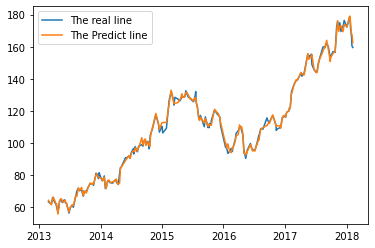

In [ ]:
plt.plot(data_test.index, data_test['close'],label='The real line')
plt.plot(data_pred.index, data_pred['close'],label="The Predict line")

plt.legend()
plt.show()

> ARIMA did very good job, as you can see that the predict line made by them are able to capture almost all of the real line

> Also verified that this is a good model according to the extremely low MSE (2.939)